In [1]:
import hiive.mdptoolbox as mdptoolbox
import hiive.mdptoolbox.mdp as mdp
import hiive.mdptoolbox.example as example
import gym
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os

## Helper Functions

In [2]:
def plot_2y_helper(dataName, y1,y2, xName, y1Name, y2Name):
    fig,ax = plt.subplots()
    # make a plot
    ax.plot(y1, color="red")
    ax.set_ylabel(y1Name,color="red",fontsize=14)
    
    ax2=ax.twinx()
    # make a plot with different y-axis using second axis object
    ax2.plot(y2,color="blue")
    ax2.set_ylabel(y2Name,color="blue",fontsize=14)

    plt.xlabel(xName)
    #plt.title(dataName + ": " +  yName + " vs " + xName)
    plt.show()

In [21]:
def plot_2_helper(dataName, xVals,y1Vals, y2Vals, xName, y1Name, y2Name):
    
    # make a plot
    fig,ax = plt.subplots()
    ax.plot(xVals, y1Vals, color="red")
    ax.set_ylabel(y1Name,color="red",fontsize=14)
    ax.set_xlabel(xName)
    #ax.set_yscale('log')
    
    # make a plot with different y-axis using second axis object
    ax2=ax.twinx()
    ax2.plot(xVals,y2Vals,color="blue")
    ax2.set_ylabel(y2Name,color="blue",fontsize=14)
    #ax2.set_yscale('log')

    #Generate Plot Labels
    plt.xlabel(xName)
    y_label = y1Name + " and " + y2Name
    plot_title = dataName + "- " +  y_label + " vs " + xName
    plt.title(plot_title)
    plt.legend()
    
    #Save Plot
    save_title = 'Figures/' + plot_title + '.png'
    plt.savefig(save_title, dpi='figure', format='png')
    
    #Show Plot
    plt.show()
    
    return

In [46]:
def plot_multiple_helper(dataName,dataX, dataY,dataLabels,xName, yName):
    
    for i in range(0,np.size(dataX)):
        plt.plot(dataX[i],dataY[i], label = dataLabels[i])

    #Generate Plot Labels
    plt.xlabel(xName)
    plt.ylabel(yName)
    plot_title = dataName + "- " +  yName + " vs " + xName
    plt.title(plot_title)
    plt.legend()
    
    #Save Plot
    save_title = 'Figures/' + plot_title + '.png'
    plt.savefig(save_title, dpi='figure', format='png')
    
    #Show Plot
    plt.show()
    
    return

In [19]:
def run_n_avg(alg,P,R,gamma,runs):
    
    times = []
    iters =[]
    values = []
    
    for i in range(runs):
        result, stats = alg(P,R,gamma)
        times.append(result.time)
        iters.append(result.iter)
        values.append(result.V)
    
    avg_time = np.mean(np.array(times))
    avg_iters = np.mean(np.array(iters))
    avg_values = np.average(values, axis=0)


    return avg_time, avg_iters, avg_values

In [26]:
def heat_map_helper(V,size):
    
    values = np.reshape(V,size)
    plt.matshow(values,cmap='hot', interpolation='nearest')
    plt.colorbar()
    plt.show()
    
    return

## Define Forest Enviornment

In [3]:
def forest_creator(S,r1,r2,p):
    
    P, R = mdptoolbox.example.forest(S=S, r1=r1, r2=r2, p=p, is_sparse=False)
    
    return P, R

# Algorithm Implementation

In [4]:
def value_iteration(P,R,gamma):
    
    vi = mdp.ValueIteration(P, R,gamma, max_iter=100000000)
    results = vi.run()
    return vi, results
    

In [5]:
def policy_iteration(P, R, gamma):
    
    pi = mdp.PolicyIteration(P, R, gamma)
    results = pi.run()
    
    return pi, results

In [6]:
def q_learn(P,R,gamma, alpha=0.1, alpha_decay=0.99999, epsilon=1.0, epsilon_decay=0.001, n_iter=1000000,verbose = False):
    
    ql = mdp.QLearning(P, R, gamma,
                 alpha=alpha, alpha_decay=alpha_decay, alpha_min=0.001,
                 epsilon=epsilon, epsilon_min=0.1, epsilon_decay=epsilon_decay,
                 n_iter=n_iter, skip_check=False, iter_callback=None,
                 run_stat_frequency=None)
    
    if verbose == True:
        print("Set Verbose = True")
        ql.setVerbose()
        
    results = ql.run()
    
    return ql, results

# Tests

In [56]:
def gamma_test(alg,P,R, divisions=10, runs=10):
    
    times = []
    iters = []
    discounts = []
    avg_values = []
    
    for discount in np.linspace(0.5,.99,divisions):
        #Run and Average 
        time, num_iters, avg_val = run_n_avg(alg,P,R,discount, runs)
        #append data
        discounts.append(discount)
        times.append(time)
        iters.append(num_iters)
        avg_values.append(avg_val)
    
    return discounts, times, iters, avg_values

In [42]:
def iter_v_Values(alg,P,R,gamma):
    results, stats = alg(P,R,gamma)
    iters = range(len(stats))
    iter_num = []
    max_v = []
    avg_v = []


    for i in iters:
        iter_num.append(stats[i]['Iteration'])
        max_v.append(stats[i]['Max V'])
        avg_v.append(stats[i]['Mean V'])
        
    return results, iter_num, max_v, avg_v

In [51]:
def convergence_test(alg,P,R, gammas, title):

    iter_nums = []
    avg_vs = []
    dataLabels = []
    last_policy = np.zeros(1000)

    for gamma in gammas:
        results, iter_num,max_v, avg_v = iter_v_Values(alg,P,R,gamma)
        iter_nums.append(iter_num)
        avg_vs.append(avg_v)
        dataLabels.append(gamma)
        dif = np.subtract(last_policy,results.policy)
        dif = np.abs(dif)
        print(dif.sum())
        last_policy=results.policy
        


    plot_multiple_helper(title,iter_nums, avg_vs,dataLabels,"Iterations", "Mean V")
    
    return

# Main

In [47]:
P,R = forest_creator(1000,1e10,1e5,.0001)

## Reward Shaping 

1000.0
35


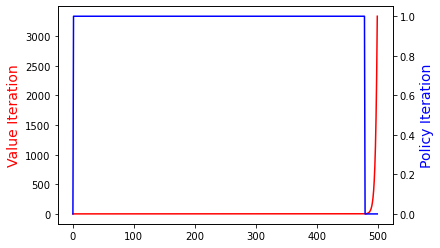

10000.0
41


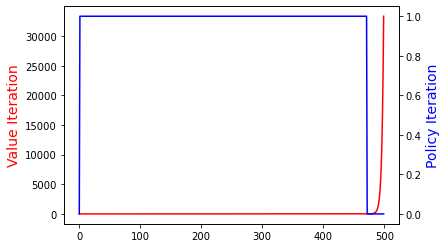

100000.0
47


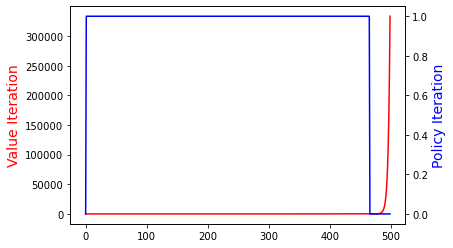

1000000.0
54


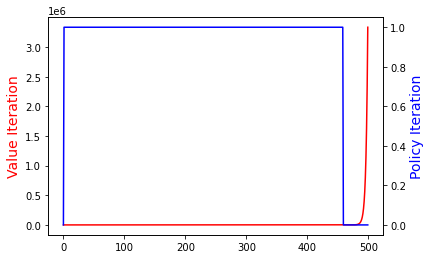

10000000.0
60


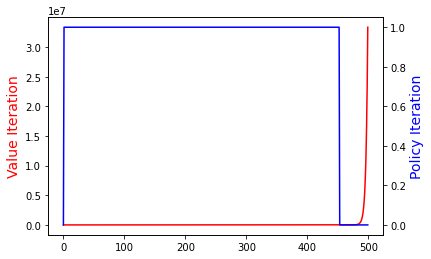

100000000.0
67


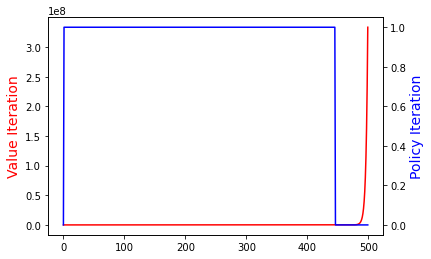

1000000000.0
73


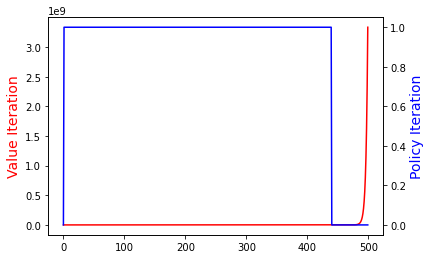

10000000000.0
80


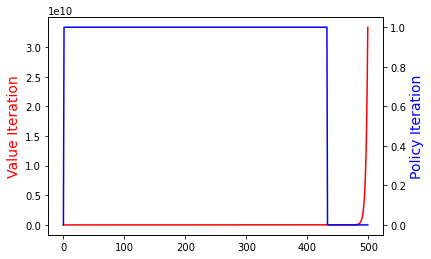

In [17]:
epsilon = .1
discount = .7
rewards = [1e3,1e4,1e5,1e6,1e7,1e8,1e9,1e10]
#r2 = r1/2
p = .000001
V_s =[]
policys =[]

for reward in rewards:
    print(reward)
    rew_2 = reward*2
    P, R = forest_creator(500,reward,rew_2,p)
    vi, vi_results = value_iteration(P,R, discount)
    #pi, pi_results = policy_iteration(P,R, discount)
    print(vi.iter)
    plot_2y_helper(str(reward), vi.V, vi.policy, "State", "Value Iteration", "Policy Iteration")



In [61]:
P, R = forest_creator(S=1000,r1=1e10,r2=1e5,p=.0001)

vi_dis, vi_times, vi_iters, vi_avg_values = gamma_test(value_iteration,P,R,divisions=10, runs=2)
pi_dis, pi_times, pi_iters, pi_avg_values = gamma_test(policy_iteration,P,R,divisions=10,runs=2)

In [40]:
np.shape(vi_avg_values)

(100, 1000)

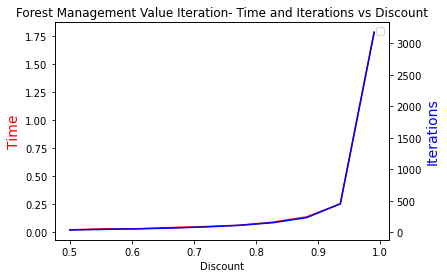

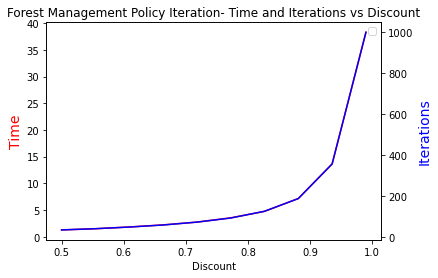

In [63]:
plot_2_helper("Forest Management Value Iteration", vi_dis,vi_times, vi_iters, "Discount", "Time", "Iterations")
plot_2_helper("Forest Management Policy Iteration", pi_dis,pi_times, pi_iters, "Discount", "Time", "Iterations")

893.0
40
79
26
33
42
57
79
118
196
223
0


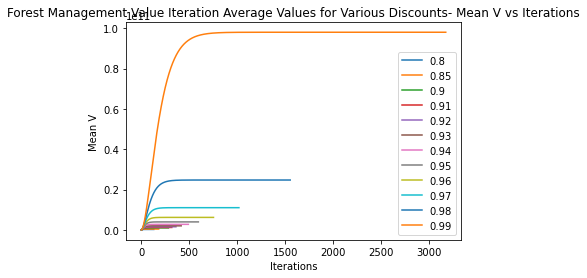

In [66]:
convergence_test(value_iteration,P,R, [.8,.85,.9,.91,.92,.93,.94,.95,.96,.97,.98,.99], "Forest Management Value Iteration Average Values for Various Discounts")

893.0
40
79
26
33
42
57
79
118
196
223
0


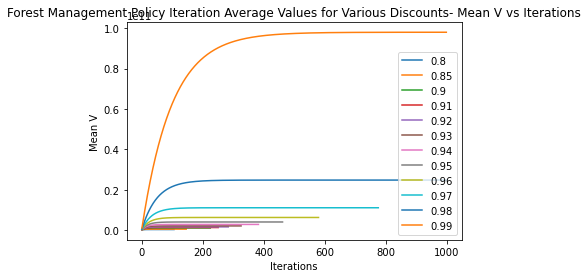

In [68]:
convergence_test(policy_iteration,P,R, [.8,.85,.9,.91,.92,.93,.94,.95,.96,.97,.98,.99], "Forest Management Policy Iteration Average Values for Various Discounts")

In [72]:
vi, vi_stats = value_iteration(P,R,.8)
pi, pi_stats = policy_iteration(P,R,.8)

heat_map_helper(vi.V)
heat_map_helper(pi.V)


TypeError: heat_map_helper() missing 1 required positional argument: 'size'